In [1]:
import pandas as pd 
import os
import cv2
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import random


In [2]:
import pandas as pd
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from skimage import feature, exposure
from skimage.measure import regionprops, label
from skimage.morphology import remove_small_objects, skeletonize
from skimage.feature import local_binary_pattern, hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import skew, kurtosis
from joblib import dump
import warnings

from tqdm import tqdm
import pickle

In [3]:
data_path_train = "DATA_BASE\DATA_BASE_TRAIN_LARGER\IMAGES_PRESPROCESSED_LARGER\CLEAN"
img_size = 256
random.seed(42)
# ---------------------- ETAPA 1: AD vs Not_AD ----------------------
categories_train_stage1 = ["AD", "CN", "LMCI"]
data_train_stage1 = []

#def create_data_stage1():
#    for category in categories_train_stage1:
#        path = os.path.join(data_path_train, category)
#        class_label = 0 if category == "AD" else 1  # AD = 0, Not_AD = 1
#        for img in tqdm(os.listdir(path), desc=f"Stage 1 - {category}"):
#            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
#            if img_array is not None:
#                new_array = cv2.resize(img_array, (img_size, img_size))
#                data_train_stage1.append([new_array, class_label])

#    random.shuffle(data_train_stage1)

def create_data_stage1():
    for category in categories_train_stage1:
        path = os.path.join(data_path_train, category)
        class_label = 0 if category == "AD" else 1  # CN = 0, Not_CN = 1
        images = os.listdir(path)
        
        # Usar 50% de CN y LMCI, 100% de AD
        if category != "AD":
            images = random.sample(images, len(images) // 2)

        for img in tqdm(images, desc=f"Stage 1 - {category}"):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is not None:
                new_array = cv2.resize(img_array, (img_size, img_size))
                data_train_stage1.append([new_array, class_label])

    random.shuffle(data_train_stage1)

create_data_stage1()

X_train_stage1 = np.array([i[0] for i in data_train_stage1])
Y_train_stage1 = np.array([i[1] for i in data_train_stage1])

with open("X_stage1_test.pickle", "wb") as f:
    pickle.dump(X_train_stage1, f)
with open("Y_stage1_test.pickle", "wb") as f:
    pickle.dump(Y_train_stage1, f)

print("Stage 1 - Train set:", X_train_stage1.shape, Y_train_stage1.shape)

# ---------------------- ETAPA 2: CN vs LMCI ----------------------
categories_train_stage2 = ["CN", "LMCI"]
data_train_stage2 = []

#def create_data_stage2():
#    for category in categories_train_stage2:
#        path = os.path.join(data_path_train, category)
#        class_label = categories_train_stage2.index(category)  # CN = 0, LMCI = 1
#        for img in tqdm(os.listdir(path), desc=f"Stage 2 - {category}"):
#            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
#            if img_array is not None:
#                new_array = cv2.resize(img_array, (img_size, img_size))
#                data_train_stage2.append([new_array, class_label])

#    random.shuffle(data_train_stage2)

def create_data_stage2():
    for category in categories_train_stage2:
        path = os.path.join(data_path_train, category)
        class_label = categories_train_stage2.index(category)  # AD = 0, LMCI = 1
        images = os.listdir(path)
        
        # Usar solo 50% de CN y LMCI
        images = random.sample(images, len(images) // 2)

        for img in tqdm(images, desc=f"Stage 2 - {category}"):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is not None:
                new_array = cv2.resize(img_array, (img_size, img_size))
                data_train_stage2.append([new_array, class_label])

    random.shuffle(data_train_stage2)

create_data_stage2()

X_train_stage2 = np.array([i[0] for i in data_train_stage2])
Y_train_stage2 = np.array([i[1] for i in data_train_stage2])

with open("X_stage2_test.pickle", "wb") as f:
    pickle.dump(X_train_stage2, f)
with open("Y_stage2_test.pickle", "wb") as f:
    pickle.dump(Y_train_stage2, f)

print("Stage 2 - Train set:", X_train_stage2.shape, Y_train_stage2.shape)




data_path_test = "DATA_BASE\\DATA_BASE_TEST\\IMAGES_PREPROCESSED_TEST\\CLEAN"

# ---------------------- ETAPA 1: AD vs Not_AD ----------------------
categories_test_stage1 = ["AD", "CN", "LMCI"]
data_test_stage1 = []

def create_data_stage1():
    for category in categories_test_stage1:
        path = os.path.join(data_path_test, category)
        class_label = 0 if category == "AD" else 1  # CN = 0, Not_AD = 1
        for img in tqdm(os.listdir(path), desc=f"Stage 1 - {category}"):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is not None:
                new_array = cv2.resize(img_array, (img_size, img_size))
                data_test_stage1.append([new_array, class_label])

    random.shuffle(data_test_stage1)

create_data_stage1()

X_test_stage1 = np.array([i[0] for i in data_test_stage1])
Y_test_stage1 = np.array([i[1] for i in data_test_stage1])

with open("X_stage1_test.pickle", "wb") as f:
    pickle.dump(X_test_stage1, f)
with open("Y_stage1_test.pickle", "wb") as f:
    pickle.dump(Y_test_stage1, f)

print("Stage 1 - Test set:", X_test_stage1.shape, Y_test_stage1.shape)

# ---------------------- ETAPA 2: CN vs LMCI ----------------------
categories_test_stage2 = ["CN", "LMCI"]
data_test_stage2 = []

def create_data_stage2():
    for category in categories_test_stage2:
        path = os.path.join(data_path_test, category)
        class_label = categories_test_stage2.index(category)  # CN = 0, LMCI = 1
        for img in tqdm(os.listdir(path), desc=f"Stage 2 - {category}"):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is not None:
                new_array = cv2.resize(img_array, (img_size, img_size))
                data_test_stage2.append([new_array, class_label])

    random.shuffle(data_test_stage2)

create_data_stage2()

X_test_stage2 = np.array([i[0] for i in data_test_stage2])
Y_test_stage2 = np.array([i[1] for i in data_test_stage2])

with open("X_stage2_test.pickle", "wb") as f:
    pickle.dump(X_test_stage2, f)
with open("Y_stage2_test.pickle", "wb") as f:
    pickle.dump(Y_test_stage2, f)

print("Stage 2 - Test set:", X_test_stage2.shape, Y_test_stage2.shape)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\javil\AppData\Local\Temp\ipykernel_9804\2008535590.py:1: SyntaxWarning: invalid escape sequence '\D'
  data_path_train = "DATA_BASE\DATA_BASE_TRAIN_LARGER\IMAGES_PRESPROCESSED_LARGER\CLEAN"
Stage 1 - LMCI: 100%|██████████| 692/692 [00:03<00:00, 180.04it/s]


Stage 1 - Train set: (2568, 256, 256) (2568,)


Stage 2 - LMCI: 100%|██████████| 692/692 [00:02<00:00, 324.52it/s]


Stage 2 - Train set: (1353, 256, 256) (1353,)


Stage 1 - LMCI: 100%|██████████| 273/273 [00:01<00:00, 172.71it/s]


Stage 1 - Test set: (840, 256, 256) (840,)


Stage 2 - LMCI: 100%|██████████| 273/273 [00:00<00:00, 3269.04it/s]


Stage 2 - Test set: (549, 256, 256) (549,)


In [4]:
images_train_stage1 = X_train_stage1
labels_train_stage1 = Y_train_stage1
images_train_stage2 = X_train_stage2
labels_train_stage2 = Y_train_stage2
images_test_stage1 = X_test_stage1
labels_test_stage1 = Y_test_stage1
images_test_stage2 = X_test_stage2
labels_test_stage2 = Y_test_stage2


print(images_train_stage1.shape)
print(labels_train_stage1.shape)
print(images_train_stage2.shape)
print(labels_train_stage2.shape)
print(images_test_stage1.shape)
print(labels_test_stage1.shape)
print(images_test_stage2.shape)
print(labels_test_stage2.shape)

(2568, 256, 256)
(2568,)
(1353, 256, 256)
(1353,)
(840, 256, 256)
(840,)
(549, 256, 256)
(549,)


Loaded 2568 images with corresponding labels.
Image shape: (256, 256)


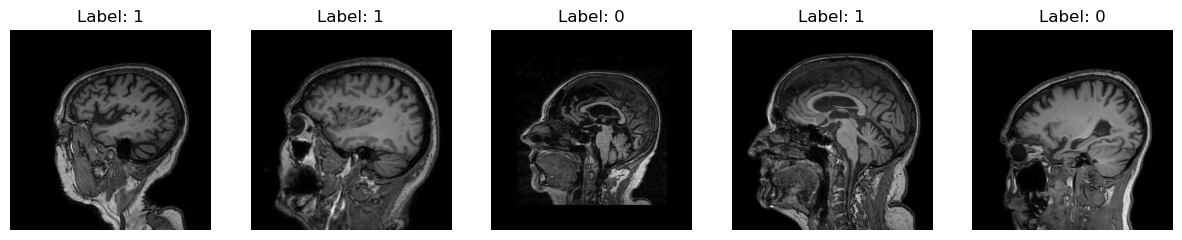

In [5]:
# Validate the loading process
print(f"Loaded {len(images_train_stage1)} images with corresponding labels.")
print(f"Image shape: {images_train_stage1[0].shape}")

# Display the first 5 images to validate
plt.figure(figsize=(15, 5))  # Adjusted figure size to fit all images

for i in range(5):
    somenum = random.randint(0, len(images_train_stage1) - 1)
    plt.subplot(1, 5, i+1)  # 1 row, 5 columns, ith subplot
    plt.imshow(images_train_stage1[somenum], cmap='gray')
    plt.title(f"Label: {labels_train_stage1[somenum]}")
    plt.axis('off')  # Turn off axes for clarity

#plt.savefig('images_loaded_clean.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()

Loaded 549 images with corresponding labels.
Image shape: (256, 256)


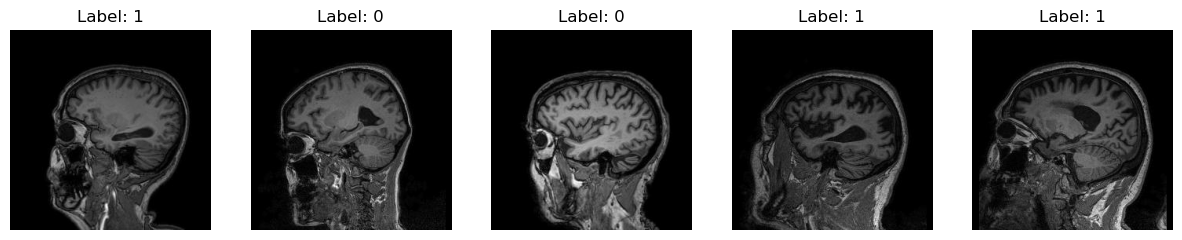

In [6]:
# Validate the loading process
print(f"Loaded {len(images_test_stage2)} images with corresponding labels.")
print(f"Image shape: {images_test_stage2[0].shape}")

# Display the first 5 images to validate
plt.figure(figsize=(15, 5))  # Adjusted figure size to fit all images

for i in range(5):
    somenum = random.randint(0, len(images_test_stage2) - 1)
    plt.subplot(1, 5, i+1)  # 1 row, 5 columns, ith subplot
    plt.imshow(images_test_stage2[somenum], cmap='gray')
    plt.title(f"Label: {labels_test_stage2[somenum]}")
    plt.axis('off')  # Turn off axes for clarity

#plt.savefig('images_loaded_clean.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()

In [7]:
images_train_stage1 = images_train_stage1.astype(np.uint8)
images_train_stage2 = images_train_stage2.astype(np.uint8)
images_test_stage1 = images_test_stage1.astype(np.uint8)
images_test_stage2 = images_test_stage2.astype(np.uint8)


# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
def apply_clahe(images):
    clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(8, 8))
    return np.array([clahe.apply(image) for image in images])

# Apply CLAHE to the loaded images
images_clahe_train_stage1 = apply_clahe(images_train_stage1)
images_clahe_train_stage2 = apply_clahe(images_train_stage2)
images_clahe_test_stage1 = apply_clahe(images_test_stage1)
images_clahe_test_stage2 = apply_clahe(images_test_stage2)
print(images_clahe_train_stage1.shape)
print(images_clahe_test_stage1.shape)
print(images_clahe_train_stage2.shape)
print(images_clahe_test_stage2.shape)

(2568, 256, 256)
(840, 256, 256)
(1353, 256, 256)
(549, 256, 256)


In [8]:
def enhanced_region_growing(image, threshold=0.2):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Use Otsu's method to get a better threshold
    _, otsu = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    otsu_threshold = _ / 255.0

    # Combine Otsu's threshold with the original threshold
    final_threshold = (threshold + otsu_threshold) / 2

    # Initialize label matrix
    labels = np.zeros_like(image)
    label_counter = 1

    # Find seed points
    seeds = np.where(image > final_threshold * image.max())

    for seed in zip(*seeds):
        if labels[seed] == 0:  # Unvisited pixel
            seed_label = label(image > final_threshold * image.max())
            labels[seed_label == seed_label[seed]] = label_counter
            label_counter += 1

    return labels

segmented_images_train_stage1 = [enhanced_region_growing(img) for img in images_clahe_train_stage1]
segmented_images_train_stage2 = [enhanced_region_growing(img) for img in images_clahe_train_stage2]
segmented_images_test_stage1 = [enhanced_region_growing(img) for img in images_clahe_test_stage1]
segmented_images_test_stage2 = [enhanced_region_growing(img) for img in images_clahe_test_stage2]

print(segmented_images_train_stage1[1].shape)
print(segmented_images_train_stage2[1].shape)
print(segmented_images_test_stage1[1].shape)
print(segmented_images_test_stage2[1].shape)

C:\Users\javil\AppData\Local\Temp\ipykernel_9804\4267385883.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  labels[seed_label == seed_label[seed]] = label_counter
C:\Users\javil\AppData\Local\Temp\ipykernel_9804\4267385883.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  labels[seed_label == seed_label[seed]] = label_counter
C:\Users\javil\AppData\Local\Temp\ipykernel_9804\4267385883.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of

(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [9]:
# HOG features
def calculate_hog(image):
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)
    return fd

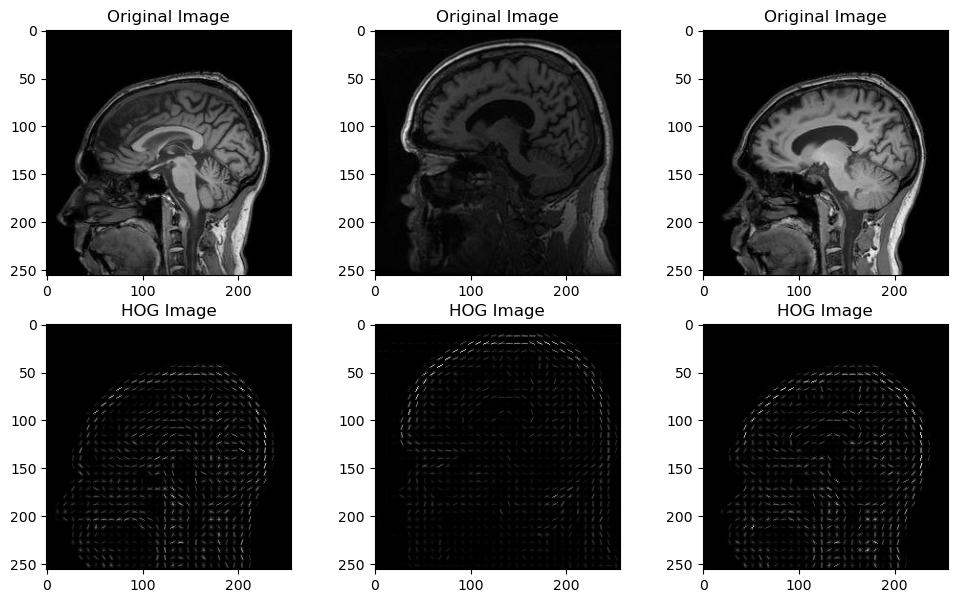

In [10]:
fd1, hog_image1 = hog(images_clahe_train_stage1[1], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
fd1, hog_image2 = hog(images_clahe_train_stage1[2], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
fd1, hog_image3 = hog(images_clahe_train_stage1[3], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

plt.figure(figsize=(12,7))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(images_train_stage1[1], cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(images_train_stage1[2], cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 3)
plt.imshow(images_train_stage1[3], cmap='gray')
plt.title('Original Image')

    # CLAHE enhanced image
plt.subplot(2, 3, 4)
plt.imshow(hog_image1, cmap='gray')
plt.title('HOG Image')

plt.subplot(2, 3, 5)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG Image')

plt.subplot(2, 3, 6)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG Image')


#plt.savefig('HOG_images_together.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()

In [11]:
# Enhanced feature extraction
def enhanced_extract_features(images, segmented_images):
    all_features = []
    feature_names = []

    for img, segmented_img in zip(images, segmented_images):
        # LBP features
        #lbp_hist = enhanced_lbp(img)

        # HOG features
        hog_features = calculate_hog(img)

        # Gabor features
        #gabor_feats = gabor_features(img)

        # Morphological features
        #morph_features = enhanced_morphological_features(segmented_img, img)

        #if not morph_features:  # Skip if no regions found
        #    continue

        # Combine all features
        combined_features = np.concatenate([
        #    lbp_hist,
            hog_features
            #gabor_feats,
        #    list(morph_features[0].values())
        ])

        all_features.append(combined_features)

        # Generate feature names (only need to do this once)
        if not feature_names:
            feature_names = (
                    #[f'LBP_{i}' for i in range(len(lbp_hist))] +
                    [f'HOG_{i}' for i in range(len(hog_features))]
                    #[f'Gabor_{i}' for i in range(len(gabor_feats))] +
                    #list(morph_features[0].keys())
            )

    return np.array(all_features), feature_names

In [12]:
from sklearn.utils import shuffle

In [13]:
    # Extracción de características
features_stage1, feature_names_stage1 = enhanced_extract_features(images_clahe_train_stage1, segmented_images_train_stage1)
features_stage2, feature_names_stage2 = enhanced_extract_features(images_clahe_train_stage2, segmented_images_train_stage2)
features_test_stage1, feature_names_test_stage1 = enhanced_extract_features(images_clahe_test_stage1, segmented_images_test_stage1)
features_test_stage2, feature_names_test_stage2 = enhanced_extract_features(images_clahe_test_stage2, segmented_images_test_stage2)

    # Preparación de Datos
le = LabelEncoder()
encoded_labels_train_stage1 = le.fit_transform(labels_train_stage1)
encoded_labels_train_stage2 = le.fit_transform(labels_train_stage2)
encoded_labels_test_stage1 = le.fit_transform(labels_test_stage1)
encoded_labels_test_stage2 = le.fit_transform(labels_test_stage2)
#X_train, y_train = train_test_split(features, encoded_labels, test_size=0.0, random_state=42, shuffle=True)
#X_test, y_test = train_test_split(features_test, encoded_labels_test, test_size=0.0, random_state=42, shuffle=True)


X_train_stage1, y_train_stage1 = shuffle(features_stage1, encoded_labels_train_stage1, random_state=42)
X_train_stage2, y_train_stage2 = shuffle(features_stage2, encoded_labels_train_stage2, random_state=42)
X_test_stage1, Y_test_stage1 = shuffle(features_test_stage1, encoded_labels_test_stage1, random_state=42)
X_test_stage2, Y_test_stage2 = shuffle(features_test_stage2, encoded_labels_test_stage2, random_state=42)

    # Estandarización
scaler = StandardScaler()
X_train_scaled_stage1 = scaler.fit_transform(X_train_stage1)
X_train_scaled_stage2 = scaler.fit_transform(X_train_stage2)
X_test_scaled_stage1 = scaler.transform(X_test_stage1)
X_test_scaled_stage2 = scaler.transform(X_test_stage2)

print(X_train_scaled_stage1.shape)
print(X_train_scaled_stage2.shape)
print(X_test_scaled_stage1.shape)
print(X_test_scaled_stage2.shape)
    # Balanceo // SMOTE
smote = SMOTE(random_state=42)
X_train_resampled_stage1, y_train_resampled_stage1 = smote.fit_resample(X_train_scaled_stage1, y_train_stage1)
X_train_resampled_stage2, y_train_resampled_stage2 = smote.fit_resample(X_train_scaled_stage2, y_train_stage2)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print(X_train_resampled_stage1.shape)
print(X_train_resampled_stage2.shape)

(2568, 34596)
(1353, 34596)
(840, 34596)
(549, 34596)
(2706, 34596)
(1384, 34596)


In [14]:
train_scores_stage1 = []
train_scores_stage2 = []
test_scores_stage1 = []
test_scores_stage2 = [] 


rf_stage1 = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=20, random_state=42, n_jobs=-1)
rf_stage1.fit(X_train_resampled_stage1, y_train_resampled_stage1)
rf_pred_stage1 = rf_stage1.predict(X_test_scaled_stage1)
print("Random Forest Accuracy:", accuracy_score(Y_test_stage1, rf_pred_stage1))
print("Random Forest depth:", 12)
#print(classification_report(y_test, rf_pred))
train_scores_stage1.append(rf_stage1.score(X_train_resampled_stage1, y_train_resampled_stage1))
test_scores_stage1.append(rf_stage1.score(X_test_scaled_stage1, Y_test_stage1)) 


rf_stage2 = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=20, random_state=42, n_jobs=-1)
rf_stage2.fit(X_train_resampled_stage2, y_train_resampled_stage2)
rf_pred_stage2 = rf_stage2.predict(X_test_scaled_stage2)
print("Random Forest Accuracy:", accuracy_score(Y_test_stage2, rf_pred_stage2))
print("Random Forest depth:", 12)
#print(classification_report(y_test, rf_pred))
train_scores_stage2.append(rf_stage2.score(X_train_resampled_stage2, y_train_resampled_stage2))
test_scores_stage2.append(rf_stage2.score(X_test_scaled_stage2, Y_test_stage2)) 

Random Forest Accuracy: 0.3464285714285714
Random Forest depth: 12
Random Forest Accuracy: 0.5719489981785064
Random Forest depth: 12


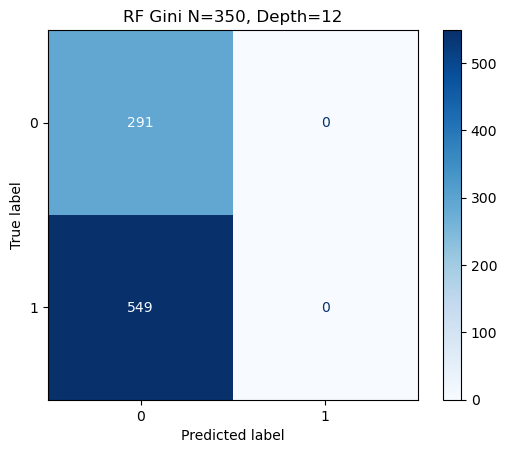

In [15]:
# Calcular la matriz de confusión
cmrf_stage1 = confusion_matrix(Y_test_stage1, rf_pred_stage1)

# Mostrar la matriz de confusión
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cmrf_stage1, display_labels=le.classes_)
fig, ax = plt.subplots()

disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('RF ' + 'Gini ' + 'N=350, Depth=12')
#plt.show()

# Save the RF confusion matrix as a JPG image
#plt.savefig("matrix_confusion_rf_HOG.jpg", format="jpg", bbox_inches='tight')
plt.show()
plt.close(fig)

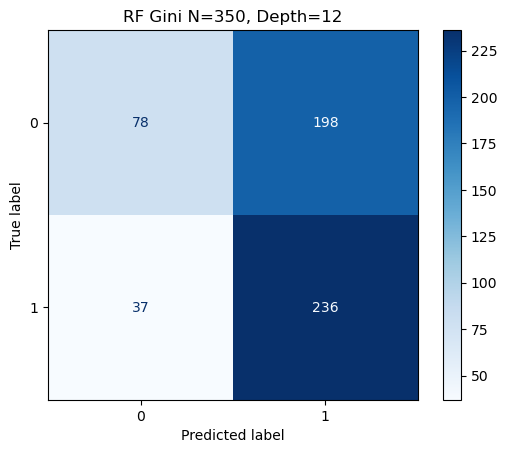

In [16]:
# Calcular la matriz de confusión
cmrf_stage2 = confusion_matrix(Y_test_stage2, rf_pred_stage2)

# Mostrar la matriz de confusión
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cmrf_stage2, display_labels=le.classes_)
fig, ax = plt.subplots()

disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('RF ' + 'Gini ' + 'N=350, Depth=12')
#plt.show()

# Save the RF confusion matrix as a JPG image
#plt.savefig("matrix_confusion_rf_HOG.jpg", format="jpg", bbox_inches='tight')
plt.show()
plt.close(fig)

In [17]:
def plot_confusion(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(title)
    plt.show()
    print(classification_report(y_true, y_pred, target_names=labels))


🧪 Evaluando Cascada completa (CN vs MCI vs AD)...


C:\Users\javil\AppData\Local\Temp\ipykernel_9804\4267385883.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  labels[seed_label == seed_label[seed]] = label_counter
C:\Users\javil\AppData\Local\Temp\ipykernel_9804\4267385883.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  labels[seed_label == seed_label[seed]] = label_counter
C:\Users\javil\AppData\Local\Temp\ipykernel_9804\4267385883.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of

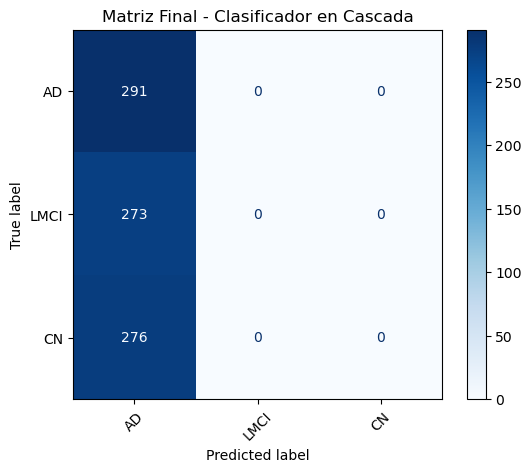

              precision    recall  f1-score   support

          AD       0.35      1.00      0.51       291
        LMCI       0.00      0.00      0.00       273
          CN       0.00      0.00      0.00       276

    accuracy                           0.35       840
   macro avg       0.12      0.33      0.17       840
weighted avg       0.12      0.35      0.18       840



d:\Downloads\anaconda\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Downloads\anaconda\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Downloads\anaconda\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# -------------------- VALIDACIÓN CASCADA COMPLETA --------------------
print("\n🧪 Evaluando Cascada completa (CN vs MCI vs AD)...")

# Cargar todas las imágenes para evaluación final
data_path_test = "DATA_BASE\\DATA_BASE_TEST\\IMAGES_PREPROCESSED_TEST\\CLEAN"
categories = ["AD", "LMCI", "CN"]
img_size = 256

X_all = []
Y_all = []

label_map = {"AD": 0, "LMCI": 1, "CN": 2}
for cat in categories:
    path = os.path.join(data_path_test, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        if img_array is not None:
            resized = cv2.resize(img_array, (img_size, img_size))
            X_all.append(resized)
            Y_all.append(label_map[cat])

X_all = np.array(X_all)
X_all = np.array(X_all).astype(np.uint8)
Y_all = np.array(Y_all)


X_all_clahe=apply_clahe(X_all)
X_all_segmented = [enhanced_region_growing(img) for img in X_all_clahe]
features_all, feature_names_all = enhanced_extract_features(X_all_clahe, X_all_segmented)


le = LabelEncoder()
encoded_labels_X_all = le.fit_transform(Y_all)

X_all_features, y_all_labels = shuffle(features_all, encoded_labels_X_all, random_state=42)


X_all_scaled = scaler.transform(features_all)

# Predicción en cascada
y_pred_final = []
for feat in X_all_scaled:
    feat_exp = np.expand_dims(feat, axis=0)
    pred1 = rf_stage1.predict(feat_exp)
    if pred1[0] == 0:
        y_pred_final.append(0)  # AD
    else:
        pred2 = rf_stage2.predict(feat_exp)
        y_pred_final.append(2 if pred2[0] == 0 else 1)  # CN:2 / LMCI:1

plot_confusion(Y_all, y_pred_final, labels=["AD", "LMCI", "CN"], title="Matriz Final - Clasificador en Cascada")

In [19]:
def verificar_cascada_consistencia(Y_all, y_pred_final, features_all, scaler, le=None):
    import numpy as np
    from collections import Counter

    print("\n🔍 Verificando consistencia del clasificador en cascada...")

    # 1. Revisión del shape de features
    print(f"✅ Features shape: {np.array(features_all).shape}")
    
    # 2. Verificar si hay NaNs o valores infinitos
    features_arr = np.array(features_all)
    if np.isnan(features_arr).any():
        print("❌ Hay valores NaN en los features")
    else:
        print("✅ No hay valores NaN")

    if np.isinf(features_arr).any():
        print("❌ Hay valores infinitos en los features")
    else:
        print("✅ No hay valores infinitos")

    # 3. Verificar que el escalado esté dentro de un rango razonable
    scaled = scaler.transform(features_arr)
    print(f"✅ Escalado - rango de valores: min {scaled.min():.2f}, max {scaled.max():.2f}")

    # 4. Comparar longitud de etiquetas reales vs predichas
    if len(Y_all) != len(y_pred_final):
        print(f"❌ Longitud distinta: Y_all={len(Y_all)} vs pred={len(y_pred_final)}")
    else:
        print("✅ Longitud de etiquetas correcta")

    # 5. Verificar distribución de clases
    print(f"✅ Distribución real: {Counter(Y_all)}")
    print(f"✅ Distribución predicha: {Counter(y_pred_final)}")

    # 6. Verificar consistencia del LabelEncoder (si se usó)
    if le:
        print(f"✅ Clases del LabelEncoder: {le.classes_.tolist()}")

    print("✅ Verificación terminada.\n")

In [20]:
verificar_cascada_consistencia(Y_all, y_pred_final, features_all, scaler, le)


🔍 Verificando consistencia del clasificador en cascada...
✅ Features shape: (840, 34596)
✅ No hay valores NaN
✅ No hay valores infinitos
✅ Escalado - rango de valores: min -2.83, max 9569.69
✅ Longitud de etiquetas correcta
✅ Distribución real: Counter({0: 291, 2: 276, 1: 273})
✅ Distribución predicha: Counter({0: 840})
✅ Clases del LabelEncoder: [0, 1, 2]
✅ Verificación terminada.

